## **CODE FOR MODEL FORMATION FOR GROUND COUPLED SPLIT A/C SYSTEM**

### Importing libraries we require for our model formation 

In [2]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.wrappers.scikit_learn
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping

### Forming our dataframe

In [ ]:

data = pd.read_excel('new data.xlsx')
data.head()

### Extracting our data

In [ ]:

inp = data[['dT', 'P']]
opt = data['BHE index']
inp.head()

In [ ]:
opt.head()

### Spliting our data in training and testing data

In [6]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( inp, opt, test_size= 0.2, random_state=42)

### Creating our basic model

In [ ]:

c = True
epochs = 130
while(c):
  
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, input_shape = [2] , activation = 'relu'),
      tf.keras.layers.Dense(8, activation = 'relu'),
      tf.keras.layers.Dense(1, activation = 'relu')
    ])


    model.compile(loss = tf.keras.losses.mse,
                optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001),
                metrics = ['accuracy'])

    early_stopping_callback = EarlyStopping(monitor='val_loss', patience= 10 , restore_best_weights = True)


    model.fit(X_train, y_train, epochs = epochs, validation_split=0.2 ,callbacks=[early_stopping_callback])
    
    c = model.stop_training
    epochs = 50


### Setting our temperature difference columns in dT array

In [8]:

dT=data['dT']
dT_train, dT_test = train_test_split(dT, test_size = 0.2, random_state=42)

### Loss of our model after optimization

In [9]:

from sklearn.metrics import mean_squared_error
p = model.predict(X_test)
mean_squared_error(y_test,p)

20/20 [==============================] - 0s 1ms/step


0.004675965631424692

### train test split graph plot

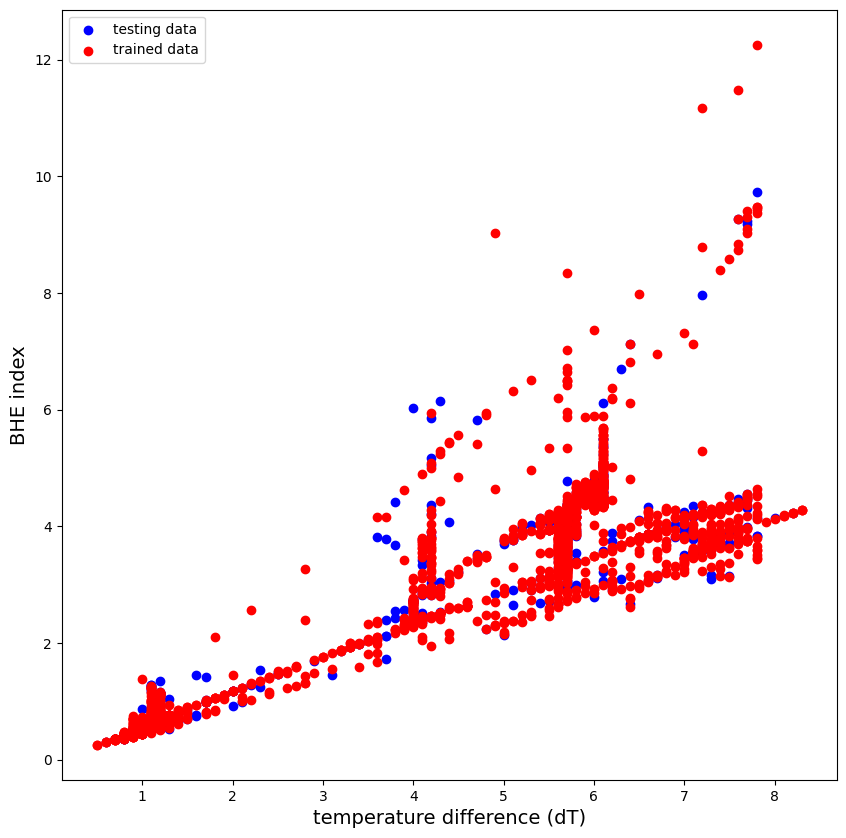

In [ ]:

pred = plt.figure(figsize=(10,10))
plt.scatter(dT_test, y_test, c = 'b', label = 'testing data') # plot test data in blue
plt.scatter(dT_train, y_train, c = 'r', label = 'trained data') # plot train data in red
plt.xlabel('temperature difference (dT)', fontsize = 14)
plt.ylabel('BHE index', fontsize = 14)
plt.legend() # show a legend

### Prediction plot 

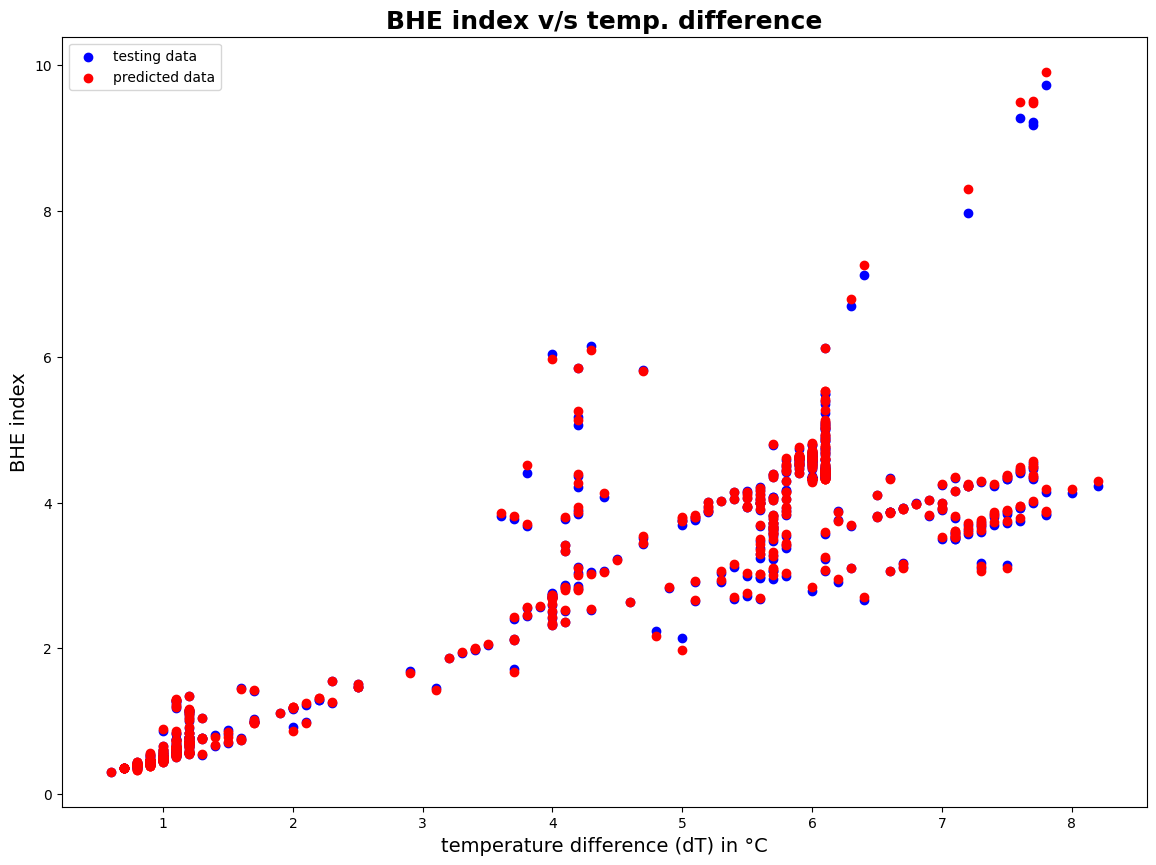

In [ ]:

pred = plt.figure(figsize=(14,10))
plt.scatter(dT_test, y_test, c = 'b', label = 'testing data') # plot test data in blue
plt.scatter(dT_test, tf.squeeze(p), c = 'r', label = 'predicted data') # plot test data in red
plt.title('BHE index v/s temp. difference', fontweight = 'bold', fontsize = 18)
plt.xlabel('temperature difference (dT) in °C', fontsize = 14)
plt.ylabel('BHE index', fontsize = 14)
plt.legend() # show a legend
pred.savefig('dT vs BHE.jpg', dpi = 400)

### prediction v/s actual graph

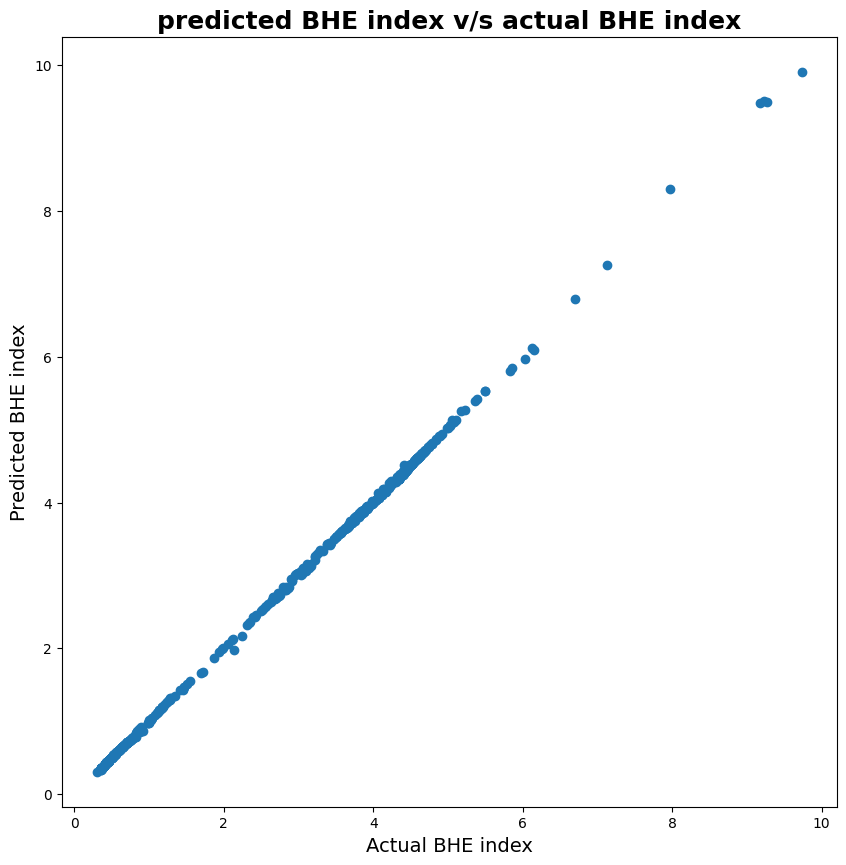

In [ ]:

final = plt.figure(figsize=(10, 10))
plt.scatter(y_test, tf.squeeze(p))
plt.title('predicted BHE index v/s actual BHE index', fontweight = 'bold', fontsize = 18)
plt.xlabel('Actual BHE index', fontsize = 14)
plt.ylabel('Predicted BHE index', fontsize = 14)
final.savefig('act vs pred.jpg', dpi = 400)

### Optimization by tuning hyperparameters using RandomSearchCV

In [ ]:

from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adagrad

def test_function (n1 = 16, n2 = 8, epochs = 30, optimizersss = 'SGD', lr  =0.01) :

  optimized_val = {'SGD' : SGD , 'Adam' : Adam , 'RMSprop' : RMSprop , 'Adagrad' : Adagrad}

  model = tf.keras.Sequential([
  tf.keras.layers.Dense(n1, input_shape = [2] , activation = 'relu'),
  tf.keras.layers.Dense(n2, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'relu')
  ])

  model.compile(loss = tf.keras.losses.mse,
            optimizer= optimized_val[optimizersss](learning_rate = lr),
            metrics = ['accuracy'])
  
  early_stopping_callback = EarlyStopping(monitor='val_loss', patience= 5 , restore_best_weights = True)

  model.fit(X_train, y_train, epochs= epochs , validation_split=0.2, callbacks=[early_stopping_callback])

  
  return model


X_train = np.array(X_train)
y_train = np.array(y_train)


epochs = np.arange(30, 210, step=10)
n1 = [1,2,4,8,16,32]
n2 = [1,2,4,8,16,32]
n3 = [1,2,4,8,16,32]
n4 = [1,2,4,8,16,32]
n5 = [1,2,4,8,16,32]
n6 = [1,2,4,8,16,32]
lr = [0.1, 0.01,0.001]
optimizersss = ['SGD','Adam','RMSprop','Adagrad']

model1 = KerasRegressor(build_fn = test_function,  verbose = 1)

param_grid = dict(n1 = n1, n2 = n2, epochs = epochs ,lr = lr , optimizersss = optimizersss  )

grid = RandomizedSearchCV(estimator = model1 , param_distributions = param_grid, n_jobs = -1 , cv = 10)

grid_result = grid.fit(X_train , y_train)

print("Best : " ,grid_result.best_score_ , grid_result.best_params_)